In [8]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [9]:
df = pd.read_csv("../data/selected_M_best12.csv")
df = df.drop_duplicates()
print(df.head())

       KLHL21        LZIC       NLRP6    MIR4537        HBA1        NFIX  \
0  408.378949  119.082494  162.813354  12.782867  422.507380  173.577873   
1  253.319773  118.435219   81.150057  16.449336   87.729792  100.889260   
2  532.444640  122.686792  180.421753   4.811247  258.203576  139.526156   
3  391.074568  132.363700  409.124164   2.406613   93.857896   57.758705   
4  399.819591  139.601812  136.251369  13.401774  751.616158  211.077941   

         JUND   MIR663AHG    PRSS46         PXK  LOC101928231       KANTR  \
0  294.678714  956.023865  1.000000  297.369844      1.000000  102.262933   
1  276.348843  652.490325  1.000000  233.580570      1.000000  103.082505   
2  255.797952  230.137969  4.009372  304.712294      5.613121   83.394944   
3  175.682729  454.849806  1.000000  204.562082      1.000000   50.538867   
4  243.465561   64.775241  2.233629  385.301002      4.467258   80.410644   

   Results  
0        1  
1        1  
2        1  
3        1  
4        1  


In [10]:
# def map_results(inpt):
#     if inpt == 'control':
#         return 0;

#     else:
#         return 1;

In [11]:
# df['Results'] = df['Results'].apply(map_results)
# print(df.head())

In [12]:

df.describe()

,KLHL21,LZIC,NLRP6,MIR4537,HBA1,NFIX,JUND,MIR663AHG,PRSS46,PXK,LOC101928231,KANTR,Results
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,341.190567,136.380108,169.348899,9.362595,5631.022563,201.365632,266.508239,681.840503,1.503599,256.507771,1.802047,68.295853,0.431034
std,132.385307,48.225795,134.415089,8.547251,22376.681531,451.931080,291.919740,1065.674828,1.423073,75.158344,1.992720,18.337080,0.497369
min,66.370880,80.726335,5.006662,1.000000,5.788649,6.753424,59.757097,8.483496,1.000000,92.618381,1.000000,10.013325,0.000000
25%,262.744890,113.147906,102.645681,3.681635,45.582804,69.344060,123.953297,83.343558,1.000000,214.513117,1.000000,56.578993,0.000000
50%,315.817003,126.301624,137.750146,5.962768,225.706240,94.318849,197.398628,300.196621,1.000000,247.881034,1.000000,70.584817,0.000000
75%,393.077684,143.457188,191.200896,12.593158,757.331937,155.725190,296.450687,770.164663,1.105834,282.903629,1.394463,80.458632,1.000000
max,1136.361050,467.984177,848.504583,39.113255,165229.888600,3351.676152,2298.238085,7208.064725,9.398235,707.927191,11.747793,105.574372,1.000000


In [13]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['KLHL21', 'LZIC', 'NLRP6', 'MIR4537', 'HBA1', 'NFIX', 'JUND', 'MIR663AHG', 'PRSS46', 'PXK', 'LOC101928231', 'KANTR', 'Results']
13


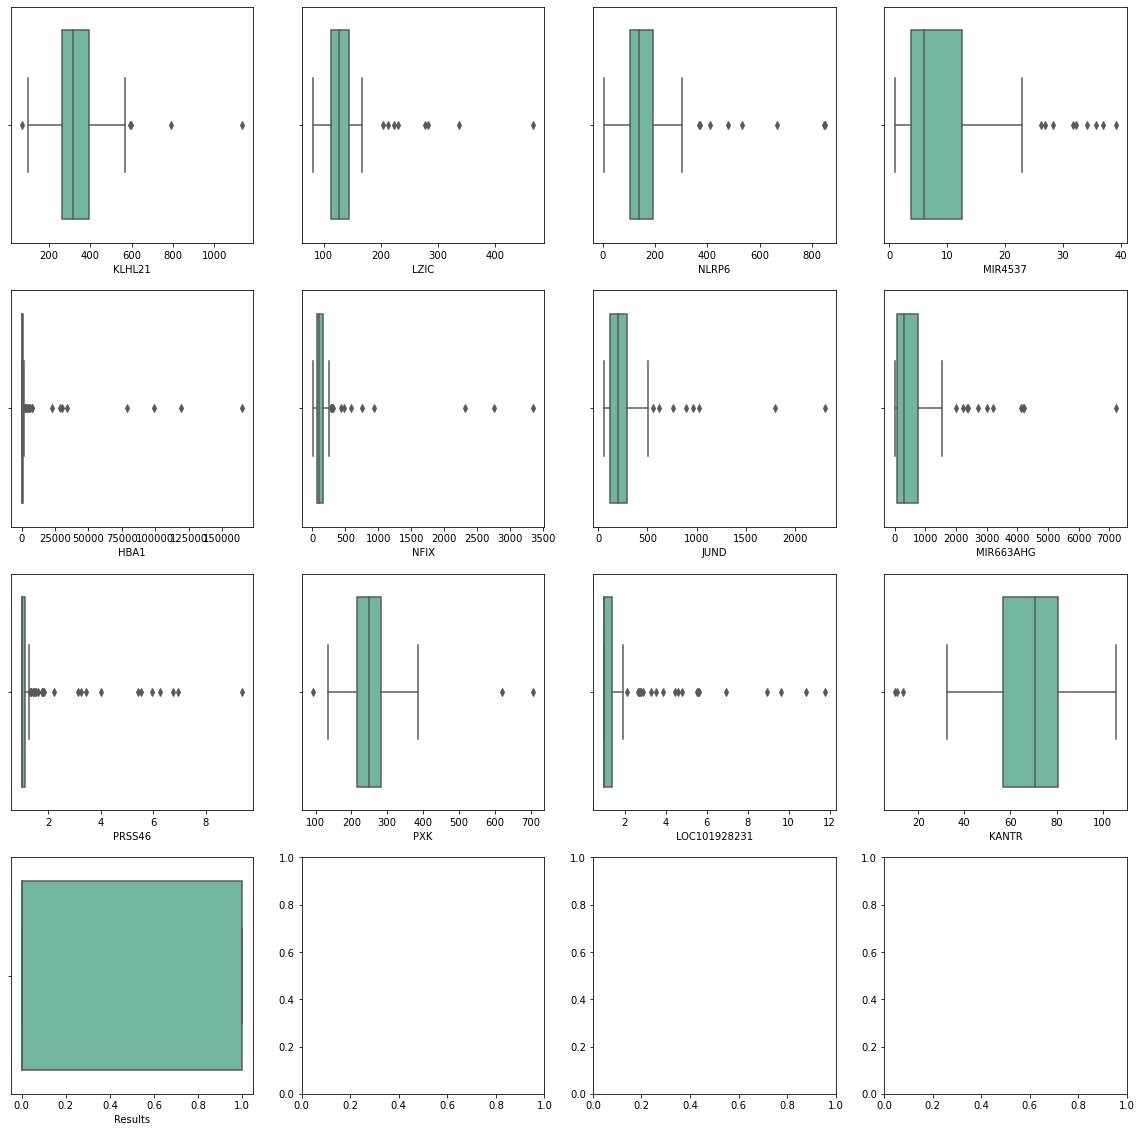

In [14]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    
    else:
        y_ += 1

In [15]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['KLHL21', 'LZIC', 'NLRP6', 'MIR4537', 'HBA1', 'NFIX', 'JUND',
       'MIR663AHG', 'PRSS46', 'PXK', 'LOC101928231', 'KANTR', 'Results'],
      dtype='object')
     KLHL21      LZIC     NLRP6   MIR4537      HBA1      NFIX      JUND  \
0  0.319637  0.099046  0.187086  0.309154  0.002522  0.049874  0.104947   
1  0.174720  0.097374  0.090271  0.405353  0.000496  0.028143  0.096758   
2  0.435587  0.108353  0.207961  0.099998  0.001528  0.039694  0.087578   
3  0.303464  0.133341  0.479097  0.036906  0.000533  0.015249  0.051788   
4  0.311637  0.152032  0.155596  0.325393  0.004514  0.061085  0.082068   

   MIR663AHG    PRSS46       PXK  LOC101928231     KANTR  Results  
0   0.131610  0.000000  0.332762      0.000000  0.965347      1.0  
1   0.089451  0.000000  0.229092      0.000000  0.973924      1.0  
2   0.030787  0.358334  0.344695      0.429216  0.767903      1.0  
3   0.061999  0.000000  0.181931      0.000000  0.424080      1.0  
4   0.007819  0.146891  0.475668      0.3226

In [16]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

0    66
1    50
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

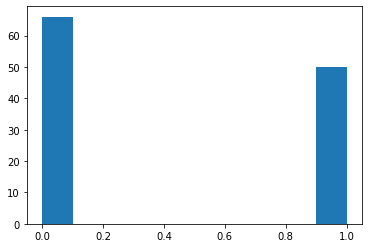

In [17]:
plt.hist(y)

1    66
0    66
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

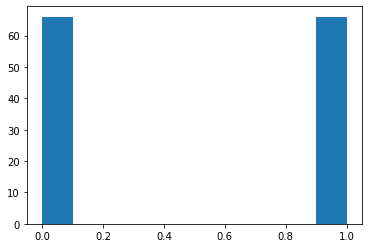

In [18]:
smt = SMOTE()
X, Y = smt.fit_resample(x,y)
print(Y.value_counts())
plt.hist(Y)

In [19]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  70.455
Standed deviation :  6.818
CV value :  3
Parameters :  {}
Accuracy :  70.455
Standed deviation :  8.089
CV value :  4
Parameters :  {}
Accuracy :  70.455
Standed deviation :  9.432
CV value :  5
Parameters :  {}
Accuracy :  77.265
Standed deviation :  7.448


In [20]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 20}
Accuracy :  78.030
Standed deviation :  6.818
CV value :  3
Parameters :  {'random_state': 2}
Accuracy :  79.545
Standed deviation :  3.214
CV value :  4
Parameters :  {'random_state': 1}
Accuracy :  81.061
Standed deviation :  5.819
CV value :  5
Parameters :  {'random_state': 1}
Accuracy :  79.658
Standed deviation :  8.925


In [21]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 3}
Accuracy :  76.515
Standed deviation :  2.273
CV value :  3
Parameters :  {'n_neighbors': 3}
Accuracy :  69.697
Standed deviation :  2.143
CV value :  4
Parameters :  {'n_neighbors': 11}
Accuracy :  77.273
Standed deviation :  3.388
CV value :  5
Parameters :  {'n_neighbors': 7}
Accuracy :  76.496
Standed deviation :  7.779


In [22]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  53.030
Standed deviation :  1.515
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  60.606
Standed deviation :  2.835
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  57.576
Standed deviation :  4.791
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  61.396
Standed deviation :  5.734


In [23]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  46.212
Standed deviation :  5.303
CV value :  3
Parameters :  {}
Accuracy :  54.545
Standed deviation :  4.910
CV value :  4
Parameters :  {}
Accuracy :  52.273
Standed deviation :  12.379
CV value :  5
Parameters :  {}
Accuracy :  54.701
Standed deviation :  9.030


In [24]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  62.121
Standed deviation :  0.000
CV value :  3
Parameters :  {'kernel': 'rbf'}
Accuracy :  66.667
Standed deviation :  8.571
CV value :  4
Parameters :  {'kernel': 'rbf'}
Accuracy :  71.212
Standed deviation :  8.159
CV value :  5
Parameters :  {'kernel': 'rbf'}
Accuracy :  70.399
Standed deviation :  9.597


In [25]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 90, 'max_features': 6, 'n_estimators': 200}
Accuracy :  81.818
Standed deviation :  4.545
CV value :  3
Parameters :  {'max_depth': 150, 'max_features': 2, 'n_estimators': 100}
Accuracy :  82.576
Standed deviation :  3.863
CV value :  4
Parameters :  {'max_depth': 90, 'max_features': 2, 'n_estimators': 200}
Accuracy :  82.576
Standed deviation :  5.819
CV value :  5
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
Accuracy :  83.390
Standed deviation :  6.037
